In [14]:
from astropy.convolution import convolve
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [2]:
Y =[[1,5,2,9,3,2],
    [6,0,7,3,9,3],
    [7,2,3,9,8,2],
    [2,1,4,0,5,2],
    [5,2,8,9,2,4]]

Y = np.array(Y)
np.squeeze(Y)

array([[1, 5, 2, 9, 3, 2],
       [6, 0, 7, 3, 9, 3],
       [7, 2, 3, 9, 8, 2],
       [2, 1, 4, 0, 5, 2],
       [5, 2, 8, 9, 2, 4]])

In [3]:
Y = np.where(Y==0, np.nan, Y)
Y

array([[ 1.,  5.,  2.,  9.,  3.,  2.],
       [ 6., nan,  7.,  3.,  9.,  3.],
       [ 7.,  2.,  3.,  9.,  8.,  2.],
       [ 2.,  1.,  4., nan,  5.,  2.],
       [ 5.,  2.,  8.,  9.,  2.,  4.]])

In [4]:
kernel = [[1,1,1],
          [1,1,1],
          [1,1,1]]

# 0 -- that cell is not included to calculate the mini grid mean

In [5]:
#Mean of Neigbouring elements: Won't work effectively for edges. 
##So choose satellite image that has a little bigger boundary than the focus area.
means = convolve(Y,kernel)
np.squeeze(means)

array([[1.5       , 2.625     , 3.25      , 3.66666667, 3.22222222,
        1.88888889],
       [2.625     , 4.125     , 5.        , 5.88888889, 5.33333333,
        3.        ],
       [2.25      , 4.        , 4.14285714, 6.        , 5.125     ,
        3.22222222],
       [2.11111111, 3.77777778, 4.75      , 6.        , 5.125     ,
        2.55555556],
       [1.11111111, 2.44444444, 3.        , 3.5       , 2.75      ,
        1.44444444]])

In [6]:
29/7

4.142857142857143

In [7]:
#Let's write a function for this:
def grid_mean(Y):
    Y = np.array(Y)
    #Replace 0s with np.nan
    Y = np.where(Y==0, np.nan, Y)
    
    kernel = [[1,1,1],
              [1,1,1],
              [1,1,1]]

    means = convolve(Y,kernel)

    means = np.squeeze(means)
    
    means[np.isnan(means)] = 0
    return means


In [8]:
df = pd.read_csv('data/indiasubcont_satpm_allyears.csv').reset_index()
df

,index,ix,iy,midlong,midlat,Y1998,Y1999,Y2000,Y2001,Y2002,...,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020,Y2021,Y2022
0,0,1,1,67.05,7.05,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2,1,67.15,7.05,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,3,1,67.25,7.05,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,4,1,67.35,7.05,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,5,1,67.45,7.05,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102395,102395,316,320,98.55,38.95,16.3,14.5,18.5,24.9,22.7,...,27.1,22.3,20.6,21.8,18.6,22.7,16.7,18.1,18.5,17.4
102396,102396,317,320,98.65,38.95,16.2,14.5,18.4,24.5,22.5,...,26.8,22.0,20.5,21.5,18.4,22.5,16.6,18.0,18.5,17.5
102397,102397,318,320,98.75,38.95,16.9,15.1,19.1,25.2,23.3,...,27.4,22.5,21.2,21.9,18.8,22.9,17.0,18.4,19.1,18.0
102398,102398,319,320,98.85,38.95,18.5,16.7,20.9,27.2,25.5,...,29.2,24.0,22.9,23.4,20.2,24.2,17.9,19.6,20.5,18.8


In [9]:
dfs_9by9means = []

for year in range(1999,2023):
    year_col = 'Y'+str(year)
    df_pivot = df.pivot_table(columns='iy',index='ix',values=year_col)
    means = grid_mean(df_pivot)
    df_9by9means = pd.DataFrame(means)
    df_9by9means.columns = df_pivot.columns
    df_9by9means.index = df_pivot.index
    df_9by9means = pd.melt(df_9by9means.reset_index(), id_vars=['ix'], value_name=year_col)
    dfs_9by9means.append(df_9by9means[[year_col]])

In [10]:
master = pd.concat(dfs_9by9means, axis=1)
master[['ix','iy','midlong','midlat']] = df[['ix','iy','midlong','midlat']]
master

,Y1999,Y2000,Y2001,Y2002,Y2003,Y2004,Y2005,Y2006,Y2007,Y2008,...,Y2017,Y2018,Y2019,Y2020,Y2021,Y2022,ix,iy,midlong,midlat
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,1,67.05,7.05
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2,1,67.15,7.05
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3,1,67.25,7.05
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4,1,67.35,7.05
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5,1,67.45,7.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102395,8.844444,11.433333,15.688889,14.100000,12.166667,14.555556,11.933333,13.977778,13.866667,13.400000,...,11.711111,14.400000,10.577778,11.311111,11.633333,11.066667,316,320,98.55,38.95
102396,9.133333,11.755556,15.922222,14.444444,12.366667,14.777778,12.033333,14.133333,14.044444,13.622222,...,11.811111,14.555556,10.688889,11.466667,11.877778,11.244444,317,320,98.65,38.95
102397,9.511111,12.144444,16.288889,14.900000,12.688889,15.044444,12.211111,14.355556,14.266667,13.911111,...,12.044444,14.777778,10.877778,11.711111,12.200000,11.466667,318,320,98.75,38.95
102398,10.000000,12.633333,16.822222,15.522222,13.144444,15.422222,12.522222,14.666667,14.566667,14.233333,...,12.377778,15.066667,11.133333,12.000000,12.600000,11.700000,319,320,98.85,38.95


In [11]:
#User input
lat = 28.64
long = 77.22
city = "Delhi, DL"

In [40]:
kernel_timeseries = master[(master.midlong == math.ceil(long * 20) / 20) & (master.midlat == math.ceil(lat * 20) / 20)]
kernel_timeseries

,Y1999,Y2000,Y2001,Y2002,Y2003,Y2004,Y2005,Y2006,Y2007,Y2008,...,Y2017,Y2018,Y2019,Y2020,Y2021,Y2022,ix,iy,midlong,midlat
69222,70.722222,79.122222,82.188889,87.977778,99.0,92.588889,88.344444,83.7,92.066667,102.0,...,114.466667,113.7,104.811111,97.022222,105.377778,98.255556,103,217,77.25,28.65


In [41]:
# Prepare timeseries for plotting
kernel_timeseries = kernel_timeseries.drop(['ix','iy','midlong','midlat'], axis=1).T
kernel_timeseries = kernel_timeseries.reset_index()
kernel_timeseries['year'] = kernel_timeseries['index'].str[1:].astype(int)
kernel_timeseries.set_index('year', inplace = True)
kernel_timeseries = kernel_timeseries.drop('index', axis=1)
kernel_timeseries.columns=['PM2.5 (μg/m3)']

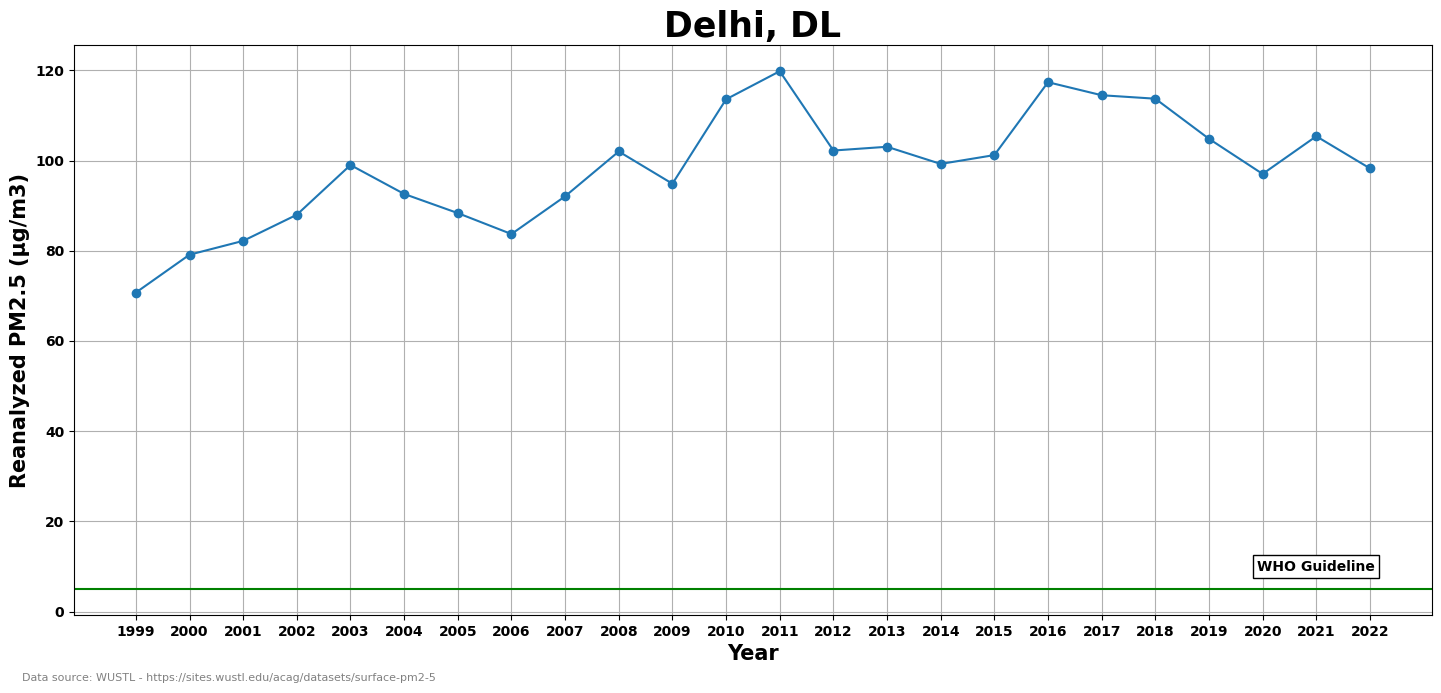

In [79]:
kernel_timeseries.plot(legend=False,
                       marker='o',
                       figsize=(15,7))
plt.xticks(kernel_timeseries.index, weight='bold')
plt.yticks(weight='bold')

plt.ylabel('Reanalyzed PM2.5 (μg/m3)',fontsize=15, weight='bold')
plt.xlabel('Year',fontsize=15, weight='bold')
plt.axhline(y = 5, color ="green", linestyle ="-")
plt.title(city, fontsize=25, weight='bold')
bbox_props = dict(boxstyle="square,pad=0.3", fc="white", ec="black", lw=1)
plt.text(2021, 10,
         'WHO Guideline',
         fontsize=10, fontweight='bold', color='black',
         ha='center', va='center',
         bbox=bbox_props
        )

# Add data source annotation
data_source_annotation = '''Data source: WUSTL - https://sites.wustl.edu/acag/datasets/surface-pm2-5'''
plt.text(0.05, 0.02, data_source_annotation, fontsize=8, color='gray', transform=plt.gcf().transFigure)

plt.tight_layout()
plt.grid()
plt.show()